In [147]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: nbAgg


In [148]:
def h(x):
    if x<-1 or x>1:
        y=0
    else:
        y=(np.cos(50*x)+np.sin(20*x))
        #y=x*2
    return y

hv = np.vectorize(h)    

<IPython.core.display.Javascript object>


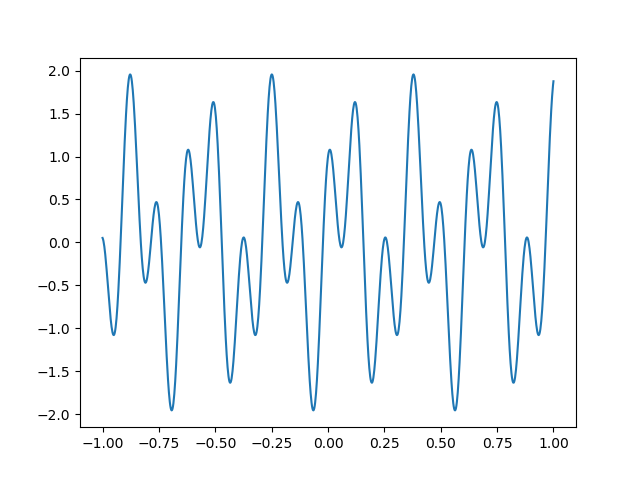

1.9576816170181162

In [150]:
X = np.linspace(-1,1,num=1000)
y=hv(X)
plt.plot(X,hv(X))
y.max()

In [136]:
def simple_greedy_search(func, start=0, N=100):
    x=start
    history=[x]
    for i in range(N):
        history.append(x)
        u = 0.001
        y=func(x)
        xleft, xright = x-u, x+u
        yleft, yright = func(xleft), func(xright)
        if yleft> yright and yleft>y:
            x=xleft
        elif yright>y:
            x=xright
    return x,history

In [151]:
start = np.random.uniform(-1,1)
x0,history = simple_greedy_search(hv,start,N=100)

<IPython.core.display.Javascript object>


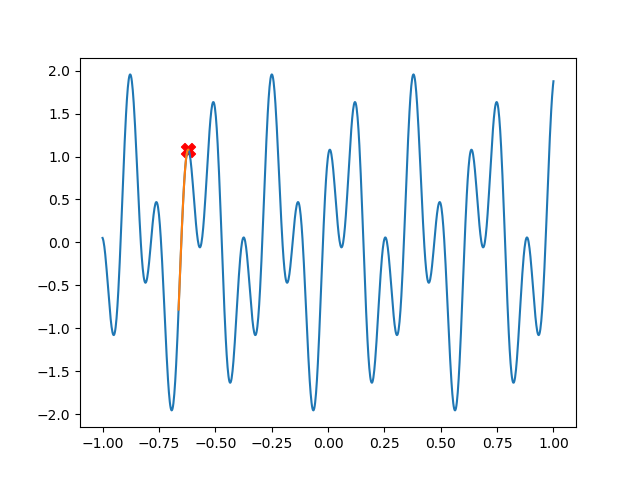

-0.6197109511041426
Best Solution 1.080110230819311
Max Possible Output 1.9576816170181162


In [152]:
plt.figure()
plt.plot(X,hv(X))
plt.scatter(x0,hv(x0),marker='X',s=100,c='r')
plt.plot(history,hv(history))
print(x0)
print('Best Solution',hv(x0))
print('Max Possible Output',y.max())

In [92]:
def sim_annealing(search_space,func,T, N=1000):
    scale = np.sqrt(T) #adjusting T(Reducing)
    start = np.random.choice(search_space)
    x = start * 1
    cur = func(x)
    history = [x]
    for i in range(N):
        nx = x + (np.random.normal(0,1)*np.sqrt(T)) #Using normal function. Uniform function can also be used as it is also a symmetric function
        if nx > 1 or nx < -1:
            nx = x
        
        u=(np.random.rand())
        p=np.exp((func(nx)-cur)/T)
       #if np.log(np.random.rand())*T>(func(nx)-cur): #prob function simplified (P= exp^(-delta f/T))
        #    nx = x
        if u>p:
            nx=x
        x = nx
        cur = func(x)
        T = 0.9*T
        history.append(x)
    return x,history

In [170]:
x1, history = sim_annealing(X, hv, T=4, N=1000)

<IPython.core.display.Javascript object>


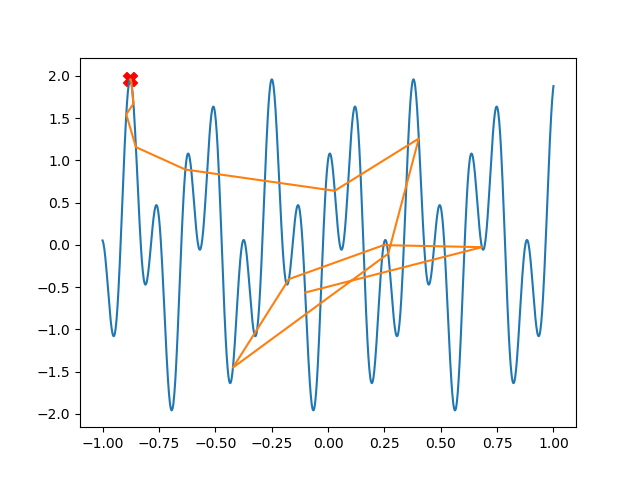

-0.8774986191639891
Best Solution 1.9576884839085893
Max Possible Output 1.9576816170181162


In [171]:
plt.figure()
plt.plot(X,hv(X))
plt.scatter(x1,hv(x1),marker='X',s=100,c='r')
plt.plot(history,hv(history))
print(x1)
print('Best Solution',hv(x1))
print('Max Possible Output',y.max())


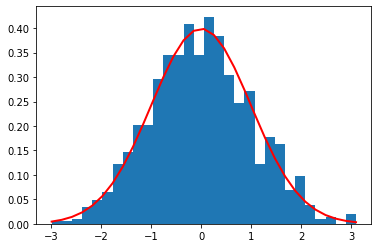

In [94]:
mean=0.0
std=1.0
array = np.random.normal(mean, std, 1000) 
#plt.hist(array)
count, bins, ignored = plt.hist(array, 30, density=True) 
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
          np.exp( - (bins - mean)**2 / (2 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 